In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


# Aclaracion
Este jupyter notebook no es parte del repositorio y solo esta para propositos evaluativos, que puedan cargar y observar como funciona esto, por falta de tiempo no se pudo experimentar propiamente las funciones requeridas. 

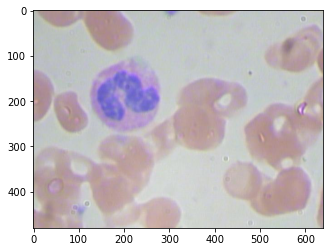

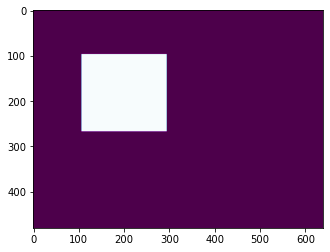

In [2]:
import data_manager as dm
import config as cg

data_loader = dm.image_loader(cg.images_folder, cg.bounding_boxes, cg.train_txt, cg.val_txt, cg.test_txt)
data_loader.set_test_mode()
index = 5
img = data_loader.get_image(index)
# print("shape: ",img.shape)
fig = plt.imshow(img)
plt.show()
mask = data_loader.get_mask(index)
# print("shape: ",img.shape)
fig = plt.imshow(mask,cmap=plt.cm.BuPu_r)
plt.show()


In [7]:
def load_element(path_save, name):
    file = open(path_save + '/' + name, 'rb')
    element = pickle.load(file)
    file.close()
    return element

path = 'models'
name = 'population_{:d}.pickle'.format(5)
population = load_element(path,name)
best_filter = population.get_best_individual()


In [8]:
filter_procesor = dm.Filter_processor(loader = data_loader)
filters = best_filter.get_filters()
mean = best_filter.mean
std = best_filter.var
output_mask = filter_procesor.predict_img(filters,mean,std,index)

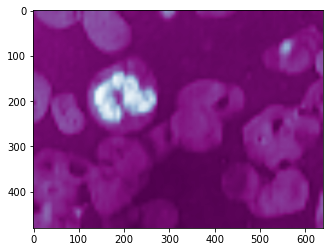

In [9]:
fig = plt.imshow(output_mask.reshape(480, 640),cmap=plt.cm.BuPu_r)
plt.show()